**Importing the Usual Libraries**

In [528]:
#importing libraries
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pandas import DataFrame 
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_samples,silhouette_score


Loading the Iris dataset

In [529]:
#loading the iris dataset sklearn 
from sklearn.datasets import load_iris
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'],iris['target']], columns= iris['feature_names'] + ['target'])


In [530]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [532]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [533]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [534]:
df.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [535]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


GMM CLUSTERING

In [536]:
#GMM CLUSTERING
from sklearn.mixture import GaussianMixture
from sklearn import mixture
gmm=GaussianMixture(n_components=3) #gaussion mixture model
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [537]:
y_gmm_cluster= gmm.predict(df)
y_gmm_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [538]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

In [539]:
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [540]:
from sklearn.datasets import make_blobs
X, y= sklearn.datasets.make_blobs(
    n_samples=2000,  
    centers=blob_centers, 
    cluster_std=blob_std, 
    shuffle=True, 
    random_state=None
 )

In [541]:
print(np.sum(y_gmm_cluster)/len(y_gmm_cluster)) #model accuracy

1.0


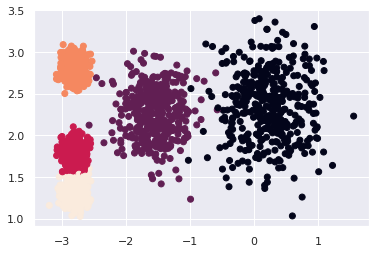

In [542]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

**KMEANS**

In [543]:

kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kms = kms.fit_predict(X)

In [544]:
print('Centroids :')
print(kms.cluster_centers_)

Centroids :
[[-2.79651389  1.55576583]
 [ 0.23239236  2.34307036]
 [-2.79051659  2.79711107]
 [-1.52077166  2.26618371]]


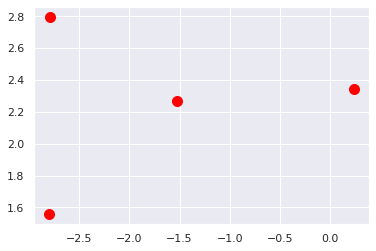

In [545]:
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')


New Instances 

In [546]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [547]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_new = km.fit_predict(X_new)

print('Y_new:',y_new)
# print('Centroids :')
#print(km.cluster_centers_)
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')


Y_new: [0 2 1 1]


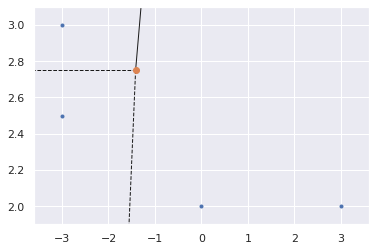

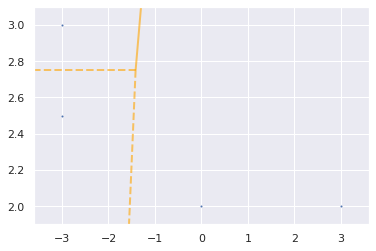

In [548]:

import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
voro = Voronoi(X_new)
voronoi_plot_2d
fig = voronoi_plot_2d(voro)
voronoi_plot_2d
fig = voronoi_plot_2d(voro, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)
plt.show()

**K=3**

In [549]:
k=3
kmodel1= KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmodel1.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [550]:
kmodel1.cluster_centers_


array([[-2.79508528,  1.55473634],
       [ 0.19260386,  2.33955759],
       [-2.18757793,  2.5404958 ]])

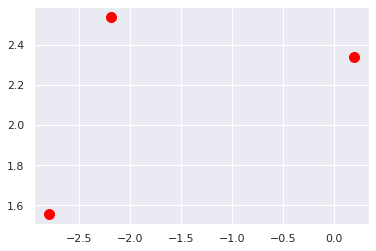

In [551]:
plt.scatter(kmodel1.cluster_centers_[:, 0], kmodel1.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')


In [552]:
y_kmodel1 = kmodel1.fit_predict(X)
print(y_kmodel1)

[0 1 0 ... 2 0 0]


**K=8**

In [553]:
k=8
kmodel8 = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmodel8 = kmodel8.fit_predict(X)


In [554]:
print('Centroids :')
print(kmodel8.cluster_centers_)


Centroids :
[[-2.79933329  1.80672692]
 [-0.13627732  2.06110401]
 [-1.55707585  2.49290773]
 [-2.79051659  2.79711107]
 [-2.79071505  1.30251553]
 [-1.49546074  2.02146652]
 [ 0.58120789  2.1489227 ]
 [ 0.14794784  2.74983549]]


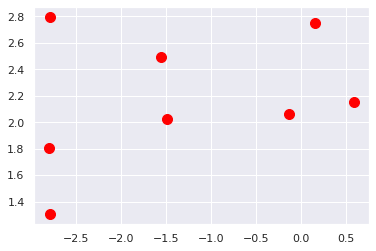

In [555]:
plt.scatter(kmodel8.cluster_centers_[:, 0], kmodel8.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')


In [556]:
kmodel8.inertia_

125.93661572454732

**Plotting inertia as a function of k**

In [557]:
# Plotting the k vs inertias
inertia = []
for i in range(1,10):
    kmeanss = KMeans(i)
    kmeanss.fit(X)
    inertia_iteration = kmeanss.inertia_
    inertia.append(inertia_iteration)
print("Inertias:",inertia)


Inertias: [3554.209657531167, 1152.7845272901122, 638.4580392832174, 269.5242509310589, 218.5431183614369, 174.22886784797805, 147.95398593087526, 125.8895176640479, 113.04399621839983]


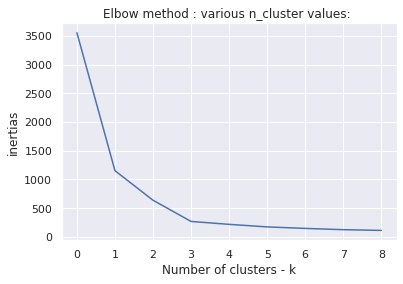

In [558]:
plt.plot(inertia)
plt.title("Elbow method : various n_cluster values: ")
plt.xlabel("Number of clusters - k")
plt.ylabel("inertias")
plt.show()
